In [1]:
import re
import requests
from bs4 import BeautifulSoup
import pandas as pd
from konlpy.tag import Okt  
okt = Okt() 
import tensorflow as tf
import numpy as np
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt


import urllib.request
from tqdm import tqdm
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

In [2]:
import matplotlib.pyplot as plt 
%matplotlib inline
from string import punctuation
import warnings
warnings.filterwarnings('ignore')

In [3]:
emotion = pd.read_csv('emotion_dataset.csv')
emotion.head(1)

,Sentence,Emotion
0,언니 동생으로 부르는게 맞는 일인가요..??,공포


In [4]:
emotion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38594 entries, 0 to 38593
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Sentence  38594 non-null  object
 1   Emotion   38594 non-null  object
dtypes: object(2)
memory usage: 603.2+ KB


## 전처리

In [5]:
emotion 

,Sentence,Emotion
0,언니 동생으로 부르는게 맞는 일인가요..??,공포
1,그냥 내 느낌일뿐겠지?,공포
2,아직너무초기라서 그런거죠?,공포
3,유치원버스 사고 낫다던데,공포
4,근데 원래이런거맞나요,공포
...,...,...
38589,솔직히 예보 제대로 못하는 데 세금이라도 아끼게 그냥 폐지해라..,혐오
38590,재미가 없으니 망하지,혐오
38591,공장 도시락 비우생적임 아르바이트했는데 화장실가성 손도 않씯고 재료 담고 바닥 떨어...,혐오
38592,코딱지 만한 나라에서 지들끼리 피터지게 싸우는 센징 클래스 ㅉㅉㅉ,혐오


In [6]:
emotion['Sentence'] = emotion['Sentence'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
# 한글과 공백을 제외하고 모두 제거
emotion[:5]

,Sentence,Emotion
0,언니 동생으로 부르는게 맞는 일인가요,공포
1,그냥 내 느낌일뿐겠지,공포
2,아직너무초기라서 그런거죠,공포
3,유치원버스 사고 낫다던데,공포
4,근데 원래이런거맞나요,공포


In [7]:
emotion['Sentence'] = emotion['Sentence'].str.replace('^ +', "") # white space 데이터를 empty value로 변경
emotion['Sentence'].replace('', np.nan, inplace=True)
print(emotion.isnull().sum())

Sentence    2
Emotion     0
dtype: int64


In [8]:
emotion[emotion['Sentence'].isnull()]

,Sentence,Emotion
10149,NaN,놀람
31822,NaN,행복


In [9]:
emotion = emotion.dropna(how = 'any')
print('전처리 후 데이터의 개수 :',len(emotion))

전처리 후 데이터의 개수 : 38592


## 데이터 라벨링

In [10]:
emotion.loc[(emotion['Emotion'] == "공포"), 'Emotion'] = 0  #공포 => 0
emotion.loc[(emotion['Emotion'] == "놀람"), 'Emotion'] = 1  #놀람 => 1
emotion.loc[(emotion['Emotion'] == "분노"), 'Emotion'] = 2  #분노 => 2
emotion.loc[(emotion['Emotion'] == "슬픔"), 'Emotion'] = 3  #슬픔 => 3
emotion.loc[(emotion['Emotion'] == "중립"), 'Emotion'] = 4  #중립 => 4
emotion.loc[(emotion['Emotion'] == "행복"), 'Emotion'] = 5  #행복 => 5
emotion.loc[(emotion['Emotion'] == "혐오"), 'Emotion'] = 6  #혐오 => 6

## 데이터 형변환 object -> int

In [11]:
## 시도 1 astype()으로 변경

In [12]:
emotion.Emotion = emotion.Emotion.astype(int)

In [13]:
emotion.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38592 entries, 0 to 38593
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Sentence  38592 non-null  object
 1   Emotion   38592 non-null  int32 
dtypes: int32(1), object(1)
memory usage: 753.8+ KB


In [14]:
emotion.Emotion.unique()

array([0, 1, 2, 3, 4, 5, 6])

---

In [15]:
## 시도 2 하나씩 분리해서 다시 append

In [16]:
fear = emotion[emotion['Emotion'] == 0]
fear['Emotion'] = 0

In [17]:
sur = emotion[emotion['Emotion'] == 1]
sur['Emotion'] = 1

In [18]:
ang = emotion[emotion['Emotion'] == 2]
ang['Emotion'] = 2
sad = emotion[emotion['Emotion'] == 3]
sad['Emotion'] = 3
neu = emotion[emotion['Emotion'] == 4]
neu['Emotion'] = 4
joy = emotion[emotion['Emotion'] == 5]
joy['Emotion'] = 5
hat = emotion[emotion['Emotion'] == 6]
hat['Emotion'] = 6

In [19]:
emotion = fear.append(sur)

In [20]:
emotion = emotion.append(ang)
emotion = emotion.append(sad)
emotion = emotion.append(neu)
emotion = emotion.append(joy)
emotion = emotion.append(hat)

---

In [21]:
emotion.shape

(38592, 2)

In [22]:
# print(data_list[0])
# print(data_list[6000])
# print(data_list[12000])
# print(data_list[18000])
# print(data_list[24000])
# print(data_list[30000])
# print(data_list[-1])

In [23]:
emotion.reset_index(drop=True,inplace=True)

In [24]:
type(emotion['Emotion'].iloc[0])

numpy.int64

## 데이터 분리

In [25]:
train_data, test_data = train_test_split(
  emotion,
  test_size = 0.25,
  random_state = 5
)

In [26]:
train_data.head(3)

,Sentence,Emotion
8793,진짜 많은 사람들앞에서 실제로 손님이 있다고치고 연습하나요,1
5134,남자친구한테 기대지않으려면 어떻게해야할까요,0
1440,유투브 땅굴 발견 전쟁임박,0


In [27]:
 # 불용어 (가사 빈도수 높은 + 감정분류와 무관한 단어 추가 중)
stop_w = ['all','이렇게','네가','있는','니가','없는','너의','너무','그런',
          'oh','whoo','tuesday','내가','너를','나를','we','this','the','그렇게',
          'so','am','baby','and','can','you','much','me','for','go','in',
          '은', '는', '이', '가', '하','부터','처럼','까지',
          'know','no','of','let','my','수','너','내','나','그','난','봐',
          '돼','건','모든','에서','에게','싶어','잖아',
          '날','널','수','것','못','말','넌','젠','하나','정말','알','여기',
          '우리','다시','하게','니까',
          '때','아','더','게','또','채','일','걸','누구','나는','너는','라면',
          '같아','있어',
          '의','가','보','들','좀','잘','걍','과','도','를','으로','우린','하지',
          '해도','하고','없어','않아',
          '자','에','와','한','하다','네','있다','나의','해','다','내게','왜',
          '거야','이제','그냥','했던','하는']

In [28]:
# 학습 데이터
X_train = []
for sentence in tqdm(train_data['Sentence']):
    tokenized_sentence = okt.morphs(sentence, stem=True) # 토큰화
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stop_w] # 불용어 제거
    X_train.append(stopwords_removed_sentence)

100%|███████████████████████████████████████████████████████████████████████████| 28944/28944 [00:59<00:00, 486.03it/s]


In [29]:
# 테스트 데이터 
X_test = []
for sentence in tqdm(test_data['Sentence']):
    tokenized_sentence = okt.morphs(sentence, stem=True) # 토큰화
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stop_w] # 불용어 제거
    X_test.append(stopwords_removed_sentence)

100%|█████████████████████████████████████████████████████████████████████████████| 9648/9648 [00:15<00:00, 614.79it/s]


In [30]:
X_train[:1]

[['진짜', '많다', '사람', '앞', '실제', '로', '손님', '연습', '하나요']]

## 정답 데이터 저장

In [31]:
y_train = np.array(train_data['Emotion'])
y_test = np.array(test_data['Emotion'])

In [32]:
drop_train = [index for index, sentence in enumerate(X_train) if len(sentence) < 1]
drop_test = [index for index, sentence in enumerate(X_test) if len(sentence) < 1]
print(drop_train)

[6145, 6853, 7993, 8338, 9141, 17672, 18777, 20080, 20274, 28235]


In [33]:
X_train = np.delete(X_train, drop_train, axis=0)
y_train = np.delete(y_train, drop_train, axis=0)
print(len(X_train))
print(len(y_train))
print(len(X_test))
print(len(y_test))
X_test = np.delete(X_test, drop_test, axis=0)
y_test = np.delete(y_test, drop_test, axis=0)
print(len(X_test))
print(len(y_test))

28934
28934
9648
9648
9640
9640


## 정수 인코딩

In [34]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

In [35]:
# print(tokenizer.word_index)
# print(tokenizer.word_counts.items())

In [36]:
print(X_train[:1])

[list(['진짜', '많다', '사람', '앞', '실제', '로', '손님', '연습', '하나요'])]


## 빈도수 확인

In [37]:
threshold = 3
total_cnt = len(tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

In [38]:
# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 19774
등장 빈도가 2번 이하인 희귀 단어의 수: 12449
단어 집합에서 희귀 단어의 비율: 62.95640740366137
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 8.144362146026966


In [39]:
# 전체 단어 개수 중 빈도수 2이하인 단어는 제거.
# 0번 패딩 토큰을 고려하여 + 1
vocab_size = total_cnt - rare_cnt + 1
print('단어 집합의 크기 :',vocab_size)

단어 집합의 크기 : 7326


In [40]:
tokenizer = Tokenizer(vocab_size) 
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

### 정수 인코딩 확인

In [41]:
print(X_train[:1])

[[9, 33, 14, 131, 982, 10, 1129, 1552, 747]]


## 패딩

문장의 최대 길이 : 112
문장의 평균 길이 : 5.9876961360337315


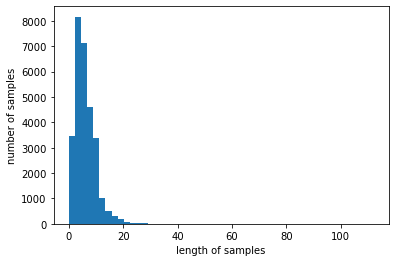

In [42]:
print('문장의 최대 길이 :',max(len(l) for l in X_train))
print('문장의 평균 길이 :',sum(map(len, X_train))/len(X_train))
plt.hist([len(s) for s in X_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [43]:
def below_threshold_len(max_len, nested_list):
    cnt = 0
    for s in nested_list:
        if(len(s) <= max_len):
            cnt = cnt + 1
    print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (cnt / len(nested_list))*100))

In [44]:
max_len = 20
below_threshold_len(max_len, X_train)

전체 샘플 중 길이가 20 이하인 샘플의 비율: 99.50577175641115


## 모든 샘플의 길이를 max_len로 조정

In [45]:
X_train = pad_sequences(X_train, maxlen = max_len)
X_test = pad_sequences(X_test, maxlen = max_len)

In [46]:
X_test[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,  729,  164,   16, 2125,  269,  126])

## 모델 적용

In [47]:
import numpy as np

In [48]:

import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D, LSTM, Embedding, Bidirectional,TimeDistributed
from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [49]:
# 결과값 seq to seq : many to many

In [50]:
# model = Sequential()
# model.add(Embedding(vocab_size, 300, mask_zero=True))
# model.add(Bidirectional(LSTM(128)))
# model.add(Dense(64,activation="relu"))
# model.add(Dense(32,activation="relu"))
# model.add(Dense(16,activation="relu"))
# model.add(Dense(7,activation='sigmoid')) # , activation='sigmoid'

## 적용 
다중 분류 모델이므로
* `softmax`
* 7가지 감정
* loss는 `binary_crossentropy`가 아닌  `sparse_categorical_crossentropy`로 compile

### EarlyStopping
* 검증 데이터 손실(val_loss)이 증가하면, 과적합 징후므로 검증 데이터 손실이 4회 증가하면 학습을 조기 종료(Early Stopping)
* ModelCheckpoint를 사용하여 검증 데이터의 정확도(val_acc)가 이전보다 좋아질 경우에만 모델을 저장
    * monitor = 모니터링하는 평가 지표 지정
    * patience = 지정 학습 수(에포크) 동안 정확도가 향상되지 않으면 이후 학습을 중지

### Dropout
* 학습 과정에서 신경망의 일부를 사용하지 않는 방법
* ex ) 드롭아웃의 비율을 0.5로 한다면 학습 과정마다 랜덤으로 절반의 뉴런을 사용하지 않고, 절반의 뉴런만을 사용
* 학습 시에 인공 신경망이 특정 뉴런 또는 특정 조합에 너무 의존적이게 되는 것을 방지
* 매번 랜덤 선택으로 뉴런들을 사용하지 않으므로 서로 다른 신경망들을 앙상블하여 사용하는 것 같은 효과를 내어 과적합을 방지

#### Dropout 비율
: 0이 될 특성의 비율, 비율이 높을수록 0이 많이 됨, 보통 0.2~0.5 사이

### weight regularization(가중치 규제) 
: 네트워크의 복잡도에 제한을 두어 가중치가 작은 값을 가지도록 강제하는 것 <br>
(이렇게 하면 가중치 값의 분포가 더 균일하게 됨)
* L2 regularization(=weight decay) : 가중치의 제곱에 비례하는 비용이 추가됨(가중치의 L2 norm)
* kernel_regularizer=regularizers.l2(0.001)
>tf.keras.layers.Dense(256, kernel_regularizer='l2', activation='relu') <br>
or  <br>
regularizer = tf.keras.regularizers.l1(l1=0.1) <br>
dense = tf.keras.layers.Dense(256, kernel_regularizer=regularizer, activation='relu') <br>
or  <br>
tf.keras.regularizers.L1(0.3)  # L1 Regularization Penalty <br>
tf.keras.regularizers.L2(0.1)  # L2 Regularization Penalty <br>
tf.keras.regularizers.L1L2(l1=0.01, l2=0.01)  # L1 + L2 penalties


### Batch Normalization
배치 정규화는 학습 시의 미니배치를 한 단위로 정규화를 하는 것으로 분포의 평균이 0, 분산이 1이 되도록 정규화하는 것

* 학습 속도가 개선된다 (학습률을 높게 설정할 수 있기 때문)
* 가중치 초깃값 선택의 의존성이 적어진다 (학습을 할 때마다 출력값을 정규화하기 때문)
* 과적합(overfitting) 위험을 줄일 수 있다 (드롭아웃 같은 기법 대체 가능)
* Gradient Vanishing 문제 해결
* gradient 의 스케일이나 초기 값에 대한 dependency 가 줄어들어 Large Learning Rate 를 설정할 수 있기 떄문에 결과적으로 빠른 학습 가능
* regularization 효과가 있기 때문에 dropout 등의 기법을 사용하지 않아도 됨 (효과가 같기 때문)
> tf.keras.layers.BatchNormalization()

### Normalization
파라미터들의 가중치의 초기값을 어떻게 설정하는가에 대한 문제<br>
가중치의 초기값에 따라서 신경망의 학습이 잘 될수도 있고 잘 안 될수도 있음

* 가중치의 초기값을 모두 같은 값으로 설정하는 경우<br>
→ 역전파 과정에서 모든 뉴런이 동일한 그래디언트 값을 갖게 되기 때문에 학습이 잘 이루어지지 않는다.
* 가중치의 초기값을  작은 난수값으로 설정하는 경우<br>
→ 그래디언트 소실 문제나 폭주 문제(그래디언트 값이 너무 작아지거나 너무 커지는 문제)가 발생할 수 있다. <br>
이는 신경망의 깊이가 깊어질수록 문제가 된다. 

Xavior norm.과 He norm.을 사용하면 위의 문제점들을 보완할 수 있다. 

#### Xavior normalization 
* 적절한 데이터가 신경망에 흐르기 위해서는 각 레이어의 출력에 대한 분산과 입력에 대한 분산이 같고, 
* 역전파에서 레이어를 통과하기 전과 후의 그래디언트 분산이 동일해야한다는 주장을 바탕으로 하는 초기화 방식
* 활성화 함수가 Sigmoid 함수이거나 Tanh 함수일 때 잘 동작한다. 
* ReLU 함수에서는 잘 동작하지 않는다.



#### He normalization 
Xavior 단점을 보완하기 위해 제시된 초기화 방식
> tf.keras.layers.Dense(1024, activation='relu', kernel_initializer='he_normal'),<br>
tf.keras.layers.Dense(256, activation='relu', kernel_initializer='he_normal')

In [ ]:
tf.keras.layers.BatchNormalization(),

### softmax , 7 , sparse_categorical_crossentropy
* 에포크는 총 15번을 수행
* 훈련 데이터 중 20%를 검증 데이터로 사용하면서 정확도를 확인

In [96]:
from sklearn.linear_model import Ridge

In [52]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

In [150]:
model = Sequential()
model.add(Embedding(vocab_size, 200, mask_zero=True))
model.add(Bidirectional(LSTM(128)))
model.add(Dense(64,activation="relu",kernel_regularizer=tf.keras.regularizers.l2(0.003), kernel_initializer='he_normal'))
model.add(Dropout(0.5)) # 드롭아웃 비율 50%
model.add(Dense(32,activation="relu",kernel_regularizer=tf.keras.regularizers.l2(0.003), kernel_initializer='he_normal'))
model.add(Dropout(0.5)) # 드롭아웃 비율 50%
#model.add(Dense(16,activation="relu"))
#model.add(Dropout(0.5)) # 드롭아웃 비율 50%
model.add(Dense(7,activation='softmax')) # , activation='sigmoid' , kernel_initializer='he_normal'


In [143]:
model = Sequential()
model.add(Embedding(vocab_size, 100))
model.add(LSTM(128))
model.add(Dropout(0.5)) # 드롭아웃 비율 50%
model.add(Dense(64,activation="relu",kernel_regularizer=tf.keras.regularizers.l2(0.0002), kernel_initializer='he_normal'))
model.add(Dropout(0.5)) # 드롭아웃 비율 50%
model.add(Dense(7, activation='softmax'))

In [151]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=10,  batch_size=32, validation_split=0.2) # callbacks=[es, mc],

Epoch 1/10
724/724 [==============================] - 109s 135ms/step - loss: 1.8506 - acc: 0.2635 - val_loss: 1.5882 - val_acc: 0.3750
Epoch 2/10
724/724 [==============================] - 123s 170ms/step - loss: 1.5317 - acc: 0.3911 - val_loss: 1.5417 - val_acc: 0.3966
Epoch 3/10
724/724 [==============================] - 112s 154ms/step - loss: 1.4112 - acc: 0.4349 - val_loss: 1.5668 - val_acc: 0.3947
Epoch 4/10
724/724 [==============================] - 124s 171ms/step - loss: 1.3177 - acc: 0.4759 - val_loss: 1.5948 - val_acc: 0.3980
Epoch 5/10
724/724 [==============================] - 115s 159ms/step - loss: 1.2356 - acc: 0.5143 - val_loss: 1.7073 - val_acc: 0.3973
Epoch 6/10
724/724 [==============================] - 119s 164ms/step - loss: 1.1442 - acc: 0.5520 - val_loss: 1.8211 - val_acc: 0.4012
Epoch 7/10
724/724 [==============================] - 107s 147ms/step - loss: 1.0709 - acc: 0.5786 - val_loss: 1.9192 - val_acc: 0.4088
Epoch 8/10
724/724 [============================

In [152]:
print("\n 테스트 정확도: %.4f" % (model.evaluate(X_test, y_test)[1]))

302/302 [==============================] - 13s 42ms/step - loss: 2.3036 - acc: 0.4036

 테스트 정확도: 0.4036


In [ ]:
# model.save('./models/multi_emotion.h5')

In [105]:
loss , acc = model.evaluate(X_test, y_test)
print('Testset Loss : ', loss)
print('Testset Acc : ', acc)

302/302 [==============================] - 8s 25ms/step - loss: 1.6322 - acc: 0.4235
Testset Loss :  1.6322131156921387
Testset Acc :  0.4235477149486542


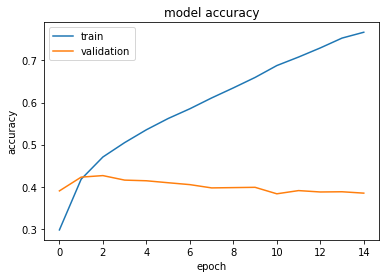

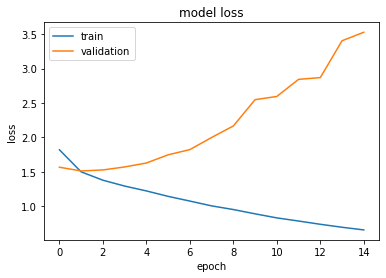

In [129]:
#  "Accuracy"
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

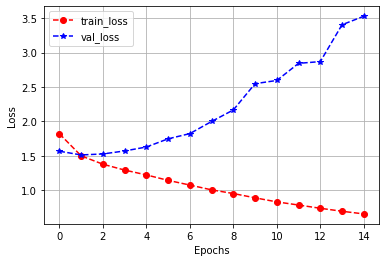

In [132]:
plt.plot(history.history['loss'], '--o', color = 'red', label = 'train_loss')
plt.plot(history.history['val_loss'], '--*', color = 'blue', label = 'val_loss')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()

In [ ]:
# loaded_model =  keras.models.load_model('./models/multi_emotion.h5')
# print("\n 테스트 정확도: %.4f" % (loaded_model.evaluate(X_test, y_test)[1]))

---